In [1]:
# Basic libraries
import numpy as np  # Numerical operations
import pandas as pd  # Data manipulation

# Visualization libraries
import matplotlib.pyplot as plt  # Plotting
import seaborn as sns  # Statistical data visualization

# Statistical libraries
from scipy import stats  # Statistical tests and analysis
import statsmodels.api as sm  # Statistical modeling


# Display settings (optional)
pd.set_option('display.max_columns', None)  # Display all columns in DataFrame
pd.set_option('display.max_rows', None)  # Display all rows in DataFrame
sns.set(style='whitegrid')  # Set the aesthetic style of the plots


In [2]:
data = pd.read_csv("New ORLEANS/listings (3).csv/listings.csv")

In [3]:
data.shape


(7033, 75)

In [4]:
data_sub=pd.read_csv("New ORLEANS/listings (1).csv")

In [5]:
data_sub.shape

(7033, 18)

In [6]:
data.head(2)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,19091,https://www.airbnb.com/rooms/19091,20240610194900,2024-06-10,city scrape,Fully Furnished Cozy Apartment,CITY OF NEW ORLEANS STR OWNER LICENSE NUMBER: ...,"NorthWest Carrollton, where this apartment is ...",https://a0.muscache.com/pictures/a5fdfd3b-5d81...,72880,https://www.airbnb.com/users/show/72880,John,2010-01-23,"New Orleans, LA",I recently (2018) retired as the Director of B...,NaN,NaN,100%,f,https://a0.muscache.com/im/users/72880/profile...,https://a0.muscache.com/im/users/72880/profile...,Riverbend,1,1,"['email', 'phone', 'work_email']",t,t,Neighborhood highlights,Leonidas,NaN,29.96100,-90.11950,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Kitchen"", ""Stove"", ""Dining table"", ""Long ter...",$60.00,1,365,1,1,1125,1125,1.0,1125.0,NaN,t,0,0,0,0,2024-06-10,503,7,0,2010-04-16,2023-11-06,4.89,4.95,4.87,4.97,4.98,4.68,4.91,"22-RSTR-14107, 22-OSTR-14105",f,1,1,0,0,2.92
1,71624,https://www.airbnb.com/rooms/71624,20240610194900,2024-06-10,city scrape,Ravenwood Manor (Historic Bywater),You are in for a very unique stay in a neighbo...,"Ours is a neighborhood made up of artists, mus...",https://a0.muscache.com/pictures/37488608/8cc1...,367223,https://www.airbnb.com/users/show/367223,Susan,2011-01-29,"New Orleans, LA",I am a decorative painter and faux finish arti...,within an hour,100%,87%,t,https://a0.muscache.com/im/users/367223/profil...,https://a0.muscache.com/im/users/367223/profil...,Bywater,1,3,"['email', 'phone']",t,f,Neighborhood highlights,Bywater,NaN,29.96153,-90.04364,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,0.0,"[""Kitchen"", ""Stove"", ""Hair dryer"", ""Hangers"", ...",$150.00,3,1125,3,3,1125,1125,3.0,1125.0,NaN,t,26,56,86,330,2024-06-10,308,17,1,2011-02-16,2024-05-17,4.95,4.92,4.93,4.98,4.98,4.84,4.90,"21-RSTR-18609, 22-OSTR-20720",f,1,1,0,0,1.90


In [7]:
data.isnull().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
name                                               0
description                                      108
neighborhood_overview                           2319
picture_url                                        1
host_id                                            0
host_url                                           0
host_name                                          0
host_since                                         0
host_location                                   2061
host_about                                      3107
host_response_time                              1276
host_response_rate                              1276
host_acceptance_rate                            1089
host_is_superhost                             

In [8]:
data_sub.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group               7033
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                             1264
minimum_nights                       0
number_of_reviews                    0
last_review                       1031
reviews_per_month                 1031
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           1279
dtype: int64

In [9]:
column_names_list = data_sub.columns.tolist()

In [10]:
column_names_list

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'number_of_reviews_ltm',
 'license']

In [11]:
column_names_list.append('host_since')
column_names_list.append('review_scores_rating')
column_names_list.append('maximum_nights')
column_names_list.append('accommodates')
column_names_list.append('property_type')


In [12]:
column_names_list=column_names_list[0:23]

In [13]:
column_names_list

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'number_of_reviews_ltm',
 'license',
 'host_since',
 'review_scores_rating',
 'maximum_nights',
 'accommodates',
 'property_type']

In [14]:
data2=data.loc[:,['id','host_since',
 'review_scores_rating',
 'maximum_nights',
 'accommodates',
 'property_type']]

In [15]:
data2.head()

,id,host_since,review_scores_rating,maximum_nights,accommodates,property_type
0,19091,2010-01-23,4.89,365,2,Entire rental unit
1,71624,2011-01-29,4.95,1125,2,Entire rental unit
2,74498,2011-02-14,4.91,1125,3,Entire rental unit
3,79536,2011-03-07,4.89,90,2,Entire rental unit
4,79609,2011-03-07,4.96,91,2,Entire guest suite


In [16]:
merged_df = pd.merge(data_sub, data2, on='id', how='inner')

In [17]:
merged_df.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group               7033
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                             1264
minimum_nights                       0
number_of_reviews                    0
last_review                       1031
reviews_per_month                 1031
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           1279
host_since                           0
review_scores_rating              1031
maximum_nights                       0
accommodates                         0
property_type                        0
dtype: int64

In [18]:
merged_df.drop(['neighbourhood_group', 'last_review', 'license'], axis=1,inplace=True)


In [19]:
merged_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'host_since', 'review_scores_rating',
       'maximum_nights', 'accommodates', 'property_type'],
      dtype='object')

In [20]:
merged_df.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                             1264
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 1031
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
host_since                           0
review_scores_rating              1031
maximum_nights                       0
accommodates                         0
property_type                        0
dtype: int64

<Axes: ylabel='Density'>

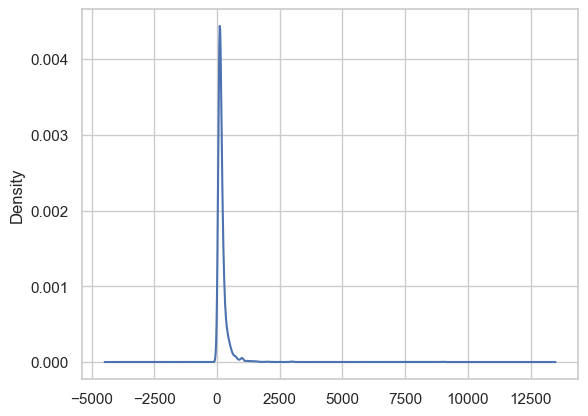

In [21]:
merged_df['price'].plot(kind='kde')

In [22]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7033 entries, 0 to 7032
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7033 non-null   int64  
 1   name                            7033 non-null   object 
 2   host_id                         7033 non-null   int64  
 3   host_name                       7033 non-null   object 
 4   neighbourhood                   7033 non-null   object 
 5   latitude                        7033 non-null   float64
 6   longitude                       7033 non-null   float64
 7   room_type                       7033 non-null   object 
 8   price                           5769 non-null   float64
 9   minimum_nights                  7033 non-null   int64  
 10  number_of_reviews               7033 non-null   int64  
 11  reviews_per_month               6002 non-null   float64
 12  calculated_host_listings_count  70

In [23]:
room_type_mapping = {
    'Entire home/apt': 1,
    'Private room': 2,
    'Hotel room': 3,
    'Shared room': 4
}

merged_df['room_type_encoded']=merged_df['room_type'].map(room_type_mapping)

In [24]:
import pandas as pd
from sklearn.impute import KNNImputer

# Select columns for imputation
columns_to_impute = ['price', 'reviews_per_month', 'latitude', 'longitude', 
                     'minimum_nights', 'number_of_reviews', 
                     'room_type_encoded', 'availability_365',
                     'number_of_reviews_ltm', 'review_scores_rating', 
                     'maximum_nights', 'accommodates']

# Apply KNN Imputer
imputer = KNNImputer(n_neighbors=5)
merged_df[columns_to_impute] = pd.DataFrame(imputer.fit_transform(merged_df[columns_to_impute]), 
                                     columns=columns_to_impute)



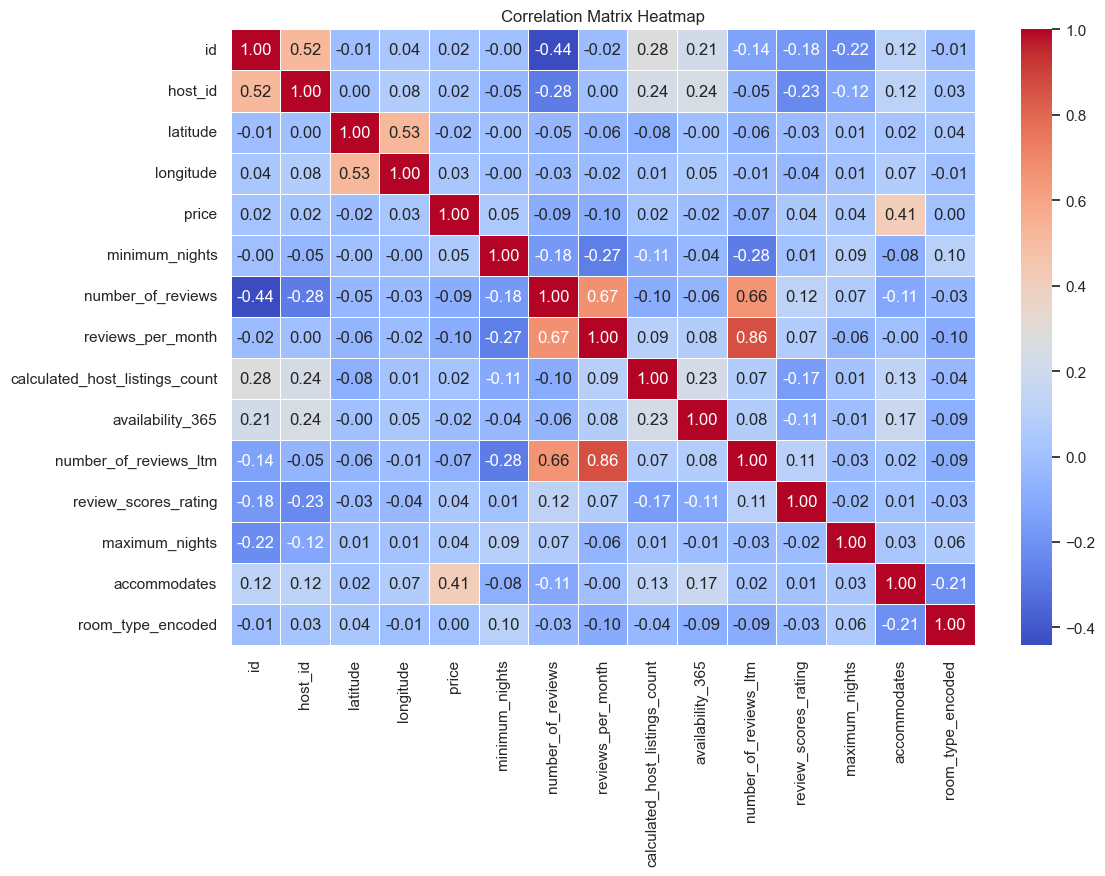

In [25]:
numerical_columns =merged_df.select_dtypes(include='number')

# Calculate the correlation matrix
corr_matrix = numerical_columns.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


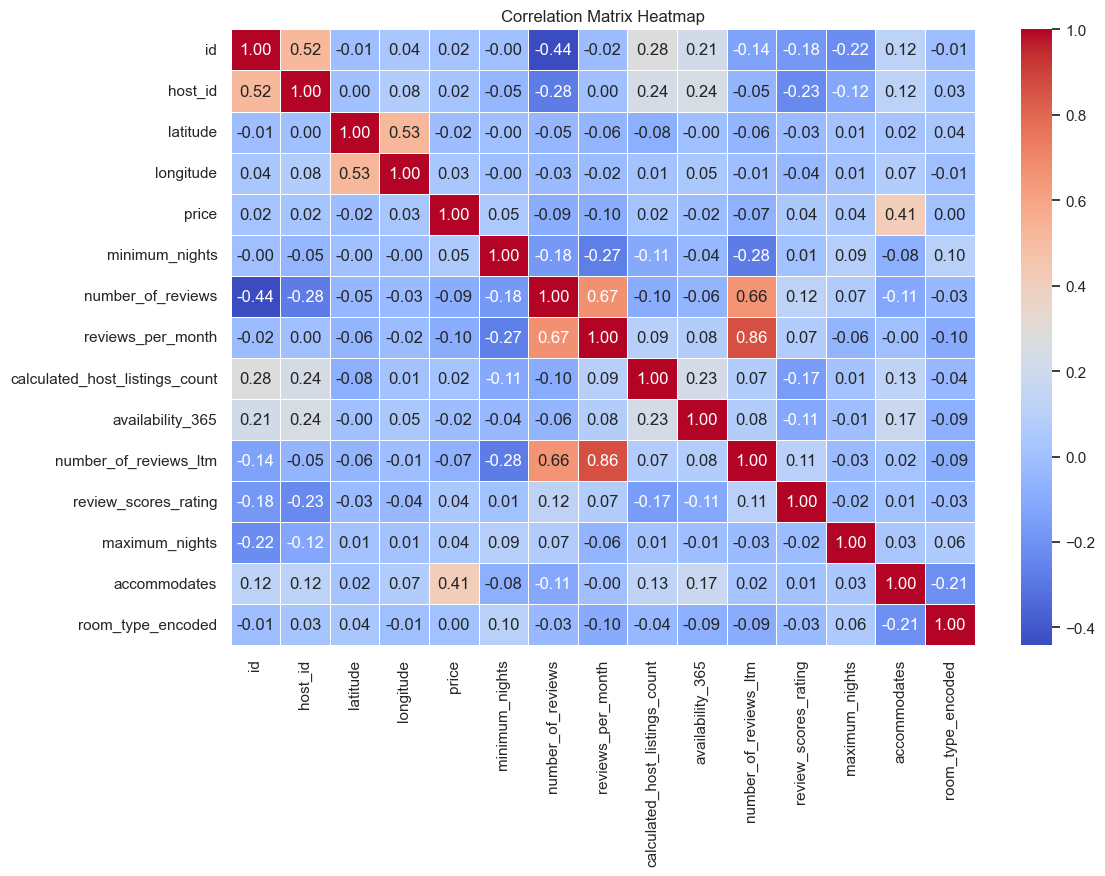

In [26]:
numerical_columns =merged_df.select_dtypes(include='number')

# Calculate the correlation matrix
corr_matrix = numerical_columns.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [27]:
merged_df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
host_since                        0
review_scores_rating              0
maximum_nights                    0
accommodates                      0
property_type                     0
room_type_encoded                 0
dtype: int64

In [28]:
merged_df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,host_since,review_scores_rating,maximum_nights,accommodates,property_type,room_type_encoded
0,19091,Fully Furnished Cozy Apartment,72880,John,Leonidas,29.96100,-90.11950,Entire home/apt,60.0,1.0,503.0,2.92,1,0.0,7.0,2010-01-23,4.89,365.0,2.0,Entire rental unit,1.0
1,71624,Ravenwood Manor (Historic Bywater),367223,Susan,Bywater,29.96153,-90.04364,Entire home/apt,150.0,3.0,308.0,1.90,1,330.0,17.0,2011-01-29,4.95,1125.0,2.0,Entire rental unit,1.0
2,74498,Maison Marais 1: Large Local Living,391462,Georgia,St. Roch,29.96986,-90.05172,Entire home/apt,85.0,3.0,627.0,3.89,3,223.0,40.0,2011-02-14,4.91,1125.0,3.0,Entire rental unit,1.0
3,79536,FeelAtHomeInNewOrleans-PrivateApt,428362,Miriam,Seventh Ward,29.97803,-90.07450,Entire home/apt,94.6,52.0,732.0,4.59,1,0.0,88.0,2011-03-07,4.89,90.0,2.0,Entire rental unit,1.0
4,79609,Bywater's Original,428909,Stephen,St. Claude,29.96448,-90.03667,Entire home/apt,36.0,30.0,502.0,3.11,1,302.0,34.0,2011-03-07,4.96,91.0,2.0,Entire guest suite,1.0


In [29]:
merged_df.to_csv('neworleans_cleaned2.csv')